# Analyzing the Data

### Import the libraries needed

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from matplotlib.patches import Rectangle


# Add the new data set

In [254]:
ultra_marathon_df = pd.read_csv('/Users/idsg/Desktop/Coding/daimil10/My_midterm/Midterm_Running/Data/UM_data_top_100.csv')

In [255]:
ultra_marathon_df = ultra_marathon_df.drop(columns=["Unnamed: 0"])

In [256]:
ultra_marathon_df['state_code'].fillna('VA', inplace=True)

/var/folders/_4/_j38q0cn0kg4pnd1jf3yvymr0000gn/T/ipykernel_54393/1262501093.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Analyzing the Data

### Does elevation average of states or elevation gain have a factor in race times?

In [257]:
state_elevation_gain_df = ultra_marathon_df.groupby('state_code')['Elevation Gain (feet)'].mean().reset_index()
state_mph_df = ultra_marathon_df.groupby('state_code')['mph'].mean().reset_index()

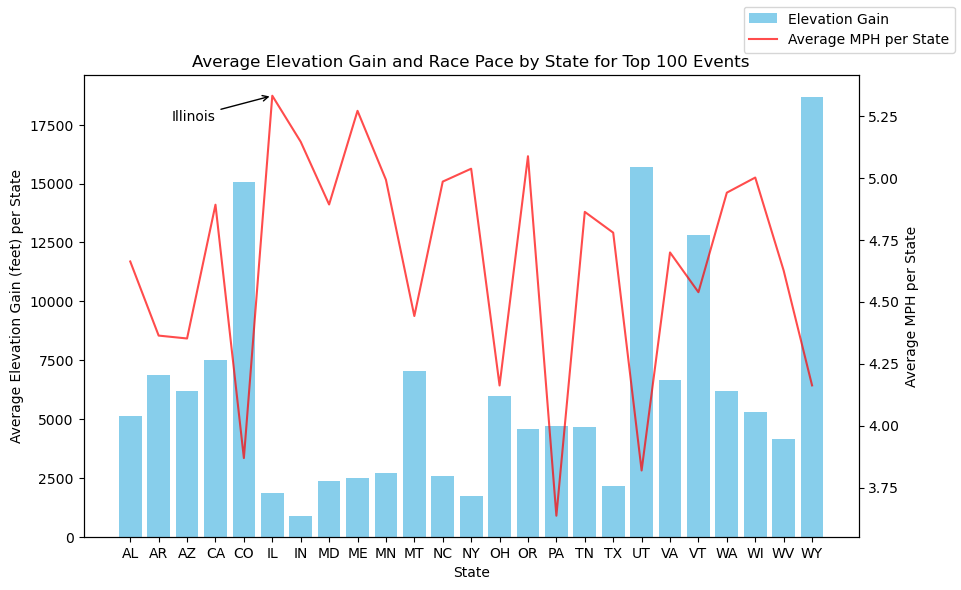

In [298]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(state_elevation_gain_df['state_code'], state_elevation_gain_df['Elevation Gain (feet)'], color='skyblue', label='Elevation Gain')
ax2 = ax1.twinx()
ax2.plot(state_mph_df['state_code'], state_mph_df['mph'], color='red', label='Average MPH per State', alpha=.7)

il_index = state_mph_df[state_mph_df['state_code'] == 'IL'].index[0] 
il_mph = state_mph_df['mph'].iloc[il_index]

ax2.annotate('Illinois', xy=('IL', il_mph), 
             xytext=(3, il_mph - 0.1),
             ha='right', 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

ax1.set_xlabel('State')
ax1.set_ylabel('Average Elevation Gain (feet) per State')
ax2.set_ylabel('Average MPH per State')
plt.title('Average Elevation Gain and Race Pace by State for Top 100 Events')
fig.legend()
plt.show()

In [259]:
state_state_elevation_df = ultra_marathon_df.groupby('state_code')['Average state elevation (feet)'].mean().reset_index()

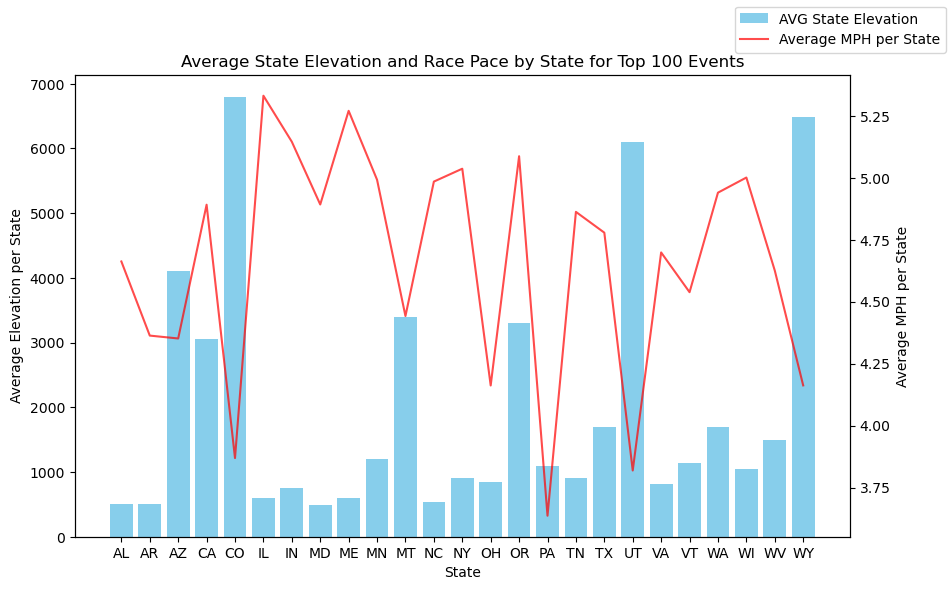

In [260]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(state_state_elevation_df['state_code'], state_state_elevation_df['Average state elevation (feet)'], color='skyblue', label='AVG State Elevation')
ax2 = ax1.twinx()
ax2.plot(state_mph_df['state_code'], state_mph_df['mph'], color='red', label='Average MPH per State', alpha=.7)
ax1.set_xlabel('State')
ax1.set_ylabel('Average Elevation per State')
ax2.set_ylabel('Average MPH per State')
plt.title('Average State Elevation and Race Pace by State for Top 100 Events')
fig.legend()
plt.show()

### Show maximum race pace per state versus elevation gain of race

In [261]:
state_max_mph_df = ultra_marathon_df.groupby('state_code')['mph'].max().reset_index()

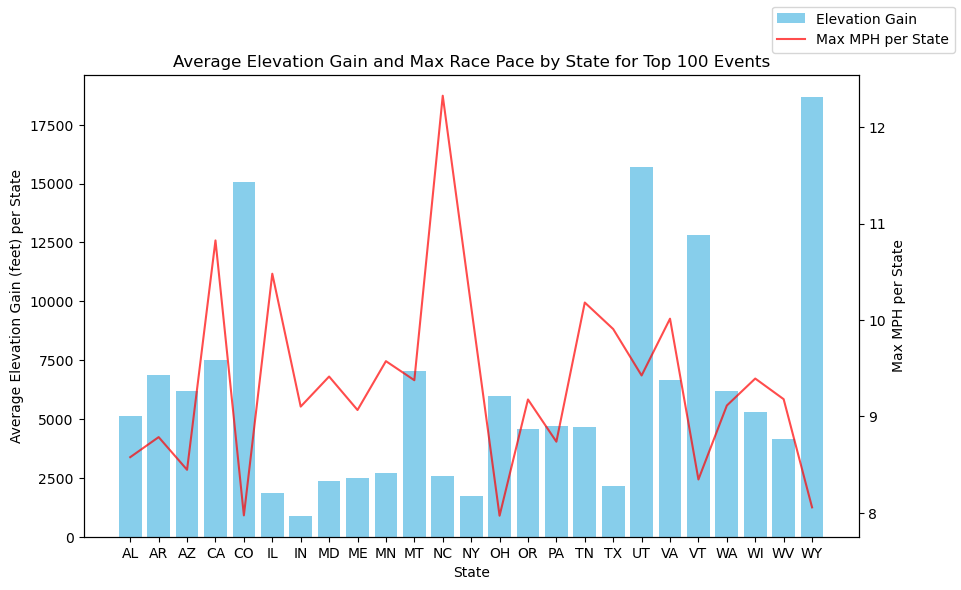

In [262]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(state_elevation_gain_df['state_code'], state_elevation_gain_df['Elevation Gain (feet)'], color='skyblue', label='Elevation Gain')
ax2 = ax1.twinx()
ax2.plot(state_max_mph_df['state_code'], state_max_mph_df['mph'], color='red', label='Max MPH per State', alpha=.7)
ax1.set_xlabel('State')
ax1.set_ylabel('Average Elevation Gain (feet) per State')
ax2.set_ylabel('Max MPH per State')
plt.title('Average Elevation Gain and Max Race Pace by State for Top 100 Events')
fig.legend()
plt.show()

### Show race pace versus total participants per year in a line plot

In [263]:
athlete_counts_per_year = ultra_marathon_df.groupby('Year of event')['Athlete ID'].nunique().T
# use in bar chart

In [264]:
min_pace_per_year = ultra_marathon_df.groupby('Year of event')['mph'].min().T
max_pace_per_year = ultra_marathon_df.groupby('Year of event')['mph'].max().T

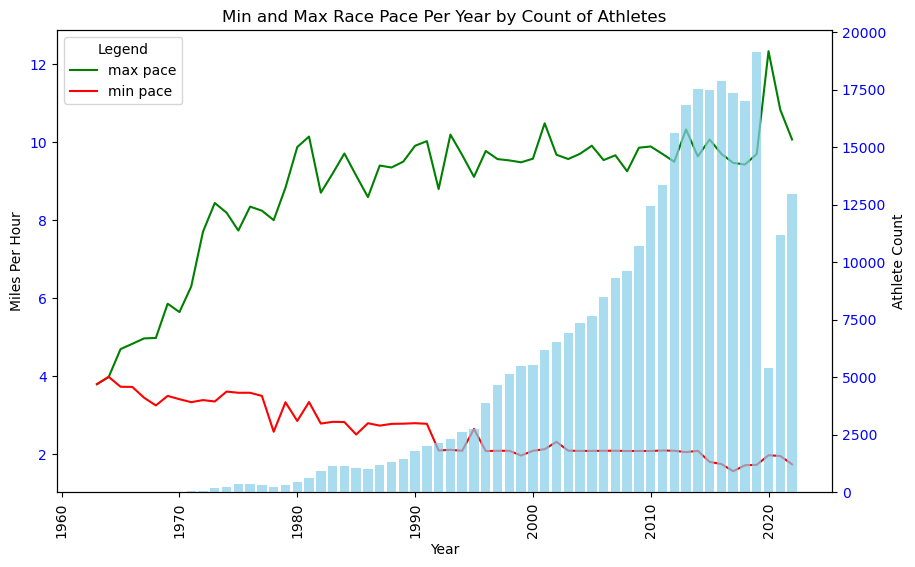

In [265]:
fix, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(max_pace_per_year, color='green', label ='max pace')
ax1.plot(min_pace_per_year, color='red', label='min pace')

ax1.set_xlabel('Year')
ax1.set_ylabel('Miles Per Hour')
ax1.tick_params(axis='y', labelcolor='b')
plt.legend(loc='upper left', title='Legend')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.bar(athlete_counts_per_year.index, height=athlete_counts_per_year, color = 'skyblue',alpha=.7)
ax2.set_ylabel('Athlete Count')
ax2.tick_params(axis='y', labelcolor='b')
plt.title('Min and Max Race Pace Per Year by Count of Athletes')

plt.show()

### Visually, where are the states located with average race pace that are higher?  Show on a map.

In [266]:
fig = px.choropleth(state_mph_df,
                     locations='state_code',
                     locationmode='USA-states',
                     color='mph',
                     color_continuous_scale='Viridis',
                     scope='usa',
                     labels={'mph': 'Average MPH per State'},
                     title="Average Race Pace for the Top 100 Ultra Marathon Events"
                     )
# fig.add_scattergeo(
#     locations=ca_md_df_filtered['state_code'],
#     locationmode='USA-states',
#     text=ca_md_df_filtered['state_code'],
#     mode='markers',
#     marker=dict(size=10, color='red'),
#     name='Key Points'
# )
# fig.update_geos(
#     visible=True,  # Hide all borders
#     projection_type="albers usa",
#     showcountries=True,
#     countrycolor="lightgray",
#     showlakes=True,
#     lakecolor="lightblue",
#     subunitcolor="black",
#     subunitwidth=0.5,
#     showland=True,
#     landcolor="white",
#     showocean=False,
#     oceancolor="blue",
#     showframe=False,
#     framecolor="lightgray",
#     showcoastlines=False,
#     coastlinecolor="lightgray"
# )

fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Average Race Pace for the Top 100 Ultra Marathon Events',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    coloraxis_colorbar=dict(
        orientation='h',
        x=0.5,
        y=-0.2,
        xanchor='center',
        yanchor='top',
        title=dict(
            text='Average MPH per State',
            side='bottom'
        )
    )
)
# fig.update_geos(fitbounds="locations")
fig.show()

### Is age associated to running faster with elevation gain?

In [267]:
true_age_df = ultra_marathon_df[(ultra_marathon_df['true age'] >= 15) & (ultra_marathon_df['true age'] < 100)]

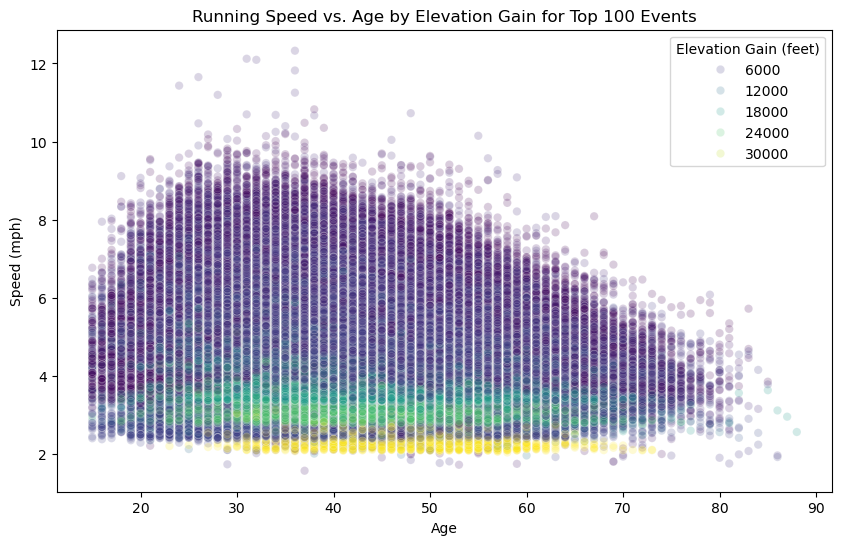

In [268]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=true_age_df['true age'], y=true_age_df['mph'], hue=true_age_df['Elevation Gain (feet)'], data=true_age_df, palette='viridis', alpha=.2)
plt.title('Running Speed vs. Age by Elevation Gain for Top 100 Events')
plt.xlabel('Age')
plt.ylabel('Speed (mph)')
plt.legend(title = 'Elevation Gain (feet)')
plt.show()

### What is the fastest running time per minimum and maximum elevation gain by state?

In [269]:
state_high_elevation_gain_df = ultra_marathon_df.groupby('state_code')['Elevation Gain (feet)'].max().reset_index()
state_low_elevation_gain_df = ultra_marathon_df.groupby('state_code')['Elevation Gain (feet)'].min().reset_index()
max_pace_per_state = ultra_marathon_df.groupby('state_code')['mph'].max()
merge_high_low_elevation_gain = pd.merge(state_high_elevation_gain_df, state_low_elevation_gain_df, on='state_code')


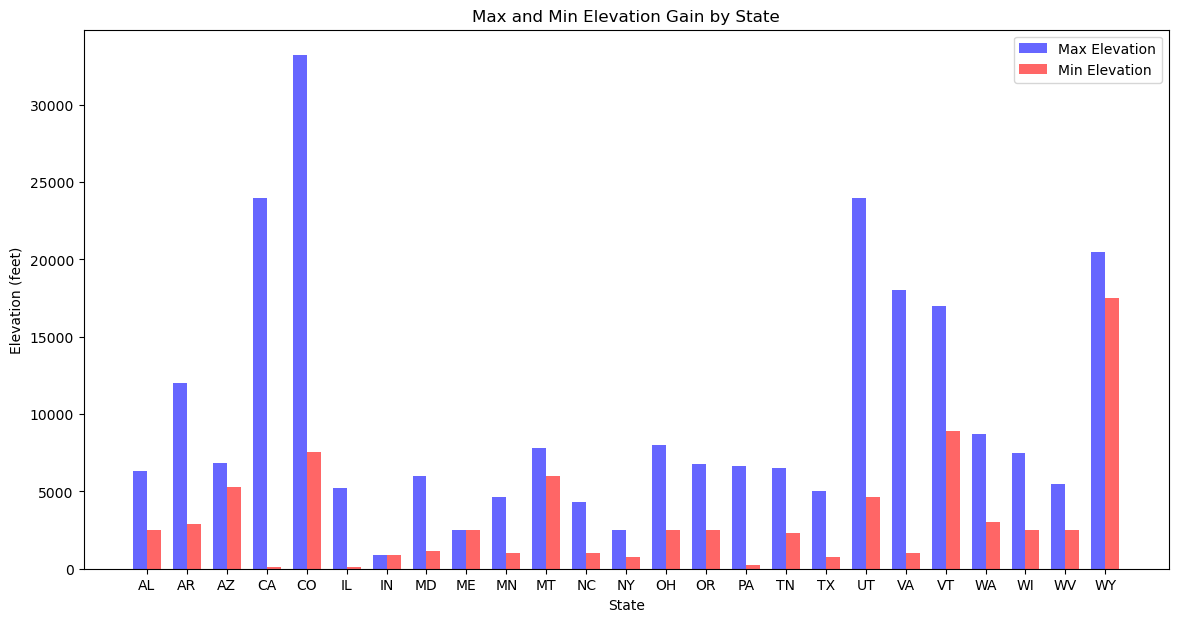

In [270]:
states = merge_high_low_elevation_gain['state_code']
bar_width = 0.35
bar_positions = range(len(states))

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(bar_positions, merge_high_low_elevation_gain['Elevation Gain (feet)_x'], bar_width, label='Max Elevation', color='b', alpha=0.6)
ax.bar([p + bar_width for p in bar_positions], merge_high_low_elevation_gain['Elevation Gain (feet)_y'], bar_width, label='Min Elevation', color='r', alpha=0.6)
ax.set_ylabel('Elevation (feet)')
ax.set_xlabel('State')
ax.set_title('Max and Min Elevation Gain by State')
ax.set_xticks([p + bar_width/2 for p in bar_positions])
ax.set_xticklabels(states)

ax.legend()

plt.show()


In [ ]:
min_elevation_paces = ultra_marathon_df.loc[ultra_marathon_df.groupby('state_code')['Elevation Gain (feet)'].idxmin()]
min_elevation_fastest_paces = min_elevation_paces.loc[min_elevation_paces.groupby('state_code')['mph'].idxmin()]
max_elevation_paces = ultra_marathon_df.loc[ultra_marathon_df.groupby('state_code')['Elevation Gain (feet)'].idxmax()]
max_elevation_fastest_paces = max_elevation_paces.loc[max_elevation_paces.groupby('state_code')['mph'].idxmin()]

merged_min_max_elevation_pace = pd.merge(min_elevation_fastest_paces, max_elevation_fastest_paces, on='state_code', suffixes=('_min_elevation', '_max_elevation'))

merged_min_max_elevation_pace

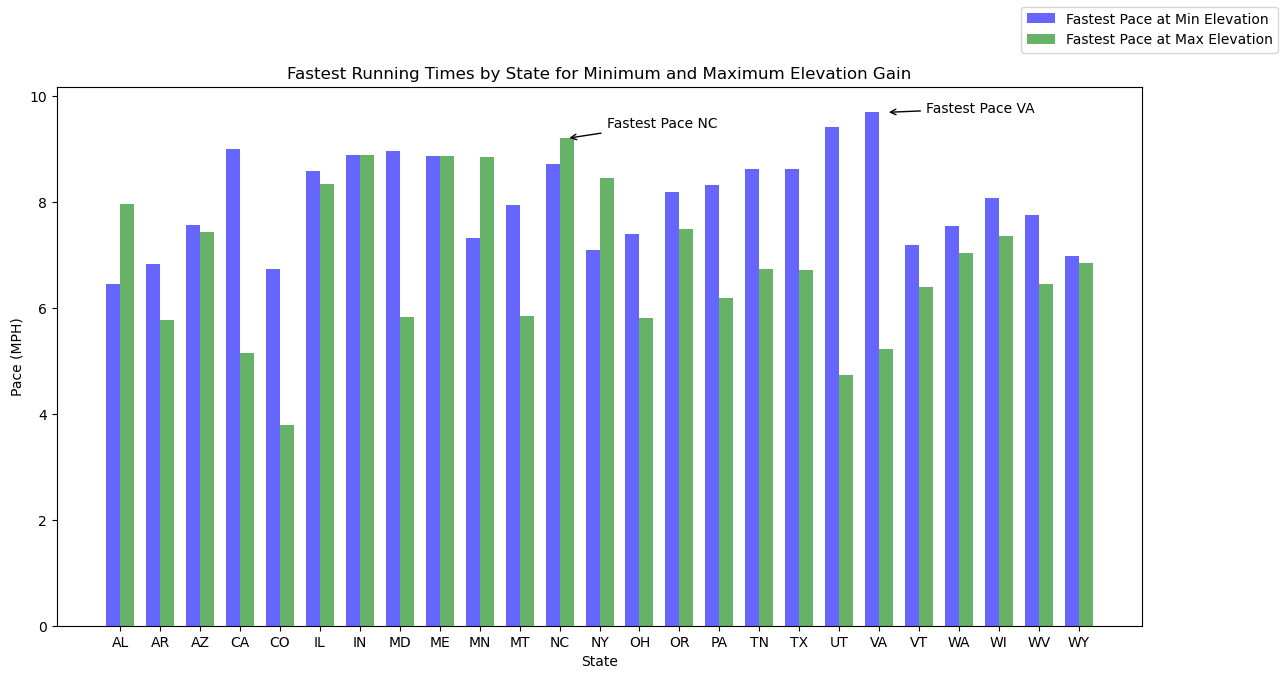

In [311]:
fig, ax = plt.subplots(figsize=(14, 7))
states = merged_min_max_elevation_pace['state_code']
bar_width = 0.35
bar_positions = range(len(states))
ax.bar(bar_positions, merged_min_max_elevation_pace['mph_min_elevation'], bar_width, label='Fastest Pace at Min Elevation', color='b', alpha=0.6)
ax.bar([p + bar_width for p in bar_positions], merged_min_max_elevation_pace['mph_max_elevation'], bar_width, label='Fastest Pace at Max Elevation', color='g', alpha=0.6)

nc_index = states[states == 'NC'].index[0] 
nc_mph_max = merged_min_max_elevation_pace.loc[nc_index, 'mph_max_elevation'] 

ax.annotate('Fastest Pace NC', 
            xy=(nc_index + bar_width, nc_mph_max), 
            xytext=(nc_index + bar_width + 1, nc_mph_max + 0.2), 
            ha='left', 
            arrowprops=dict(facecolor='black', arrowstyle='->'))

va_index = states[states == 'VA'].index[0] 
va_mph_max = merged_min_max_elevation_pace.loc[va_index, 'mph_min_elevation'] 

ax.annotate('Fastest Pace VA', 
            xy=(va_index + bar_width, va_mph_max), 
            xytext=(va_index + bar_width + 1, va_mph_max + 0), 
            ha='left', 
            arrowprops=dict(facecolor='black', arrowstyle='->'))


ax.set_ylabel('Pace (MPH)')
ax.set_xlabel('State')
ax.set_title('Fastest Running Times by State for Minimum and Maximum Elevation Gain')
ax.set_xticks([p + bar_width/2 for p in bar_positions])
ax.set_xticklabels(states)


fig.legend()
plt.show()


### Find a correlation between age and race location (state) along with the time it takes them to run the races (average MPH).  Is there a correlation?

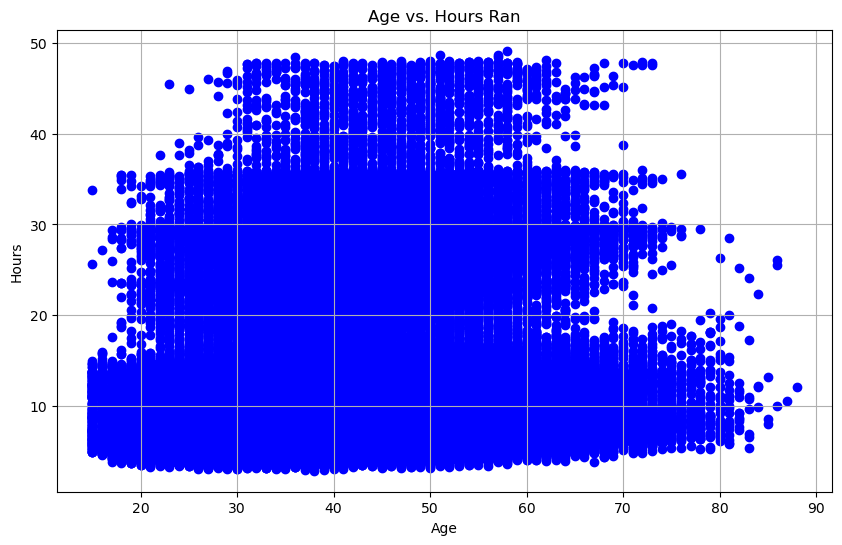

<Figure size 1200x800 with 0 Axes>

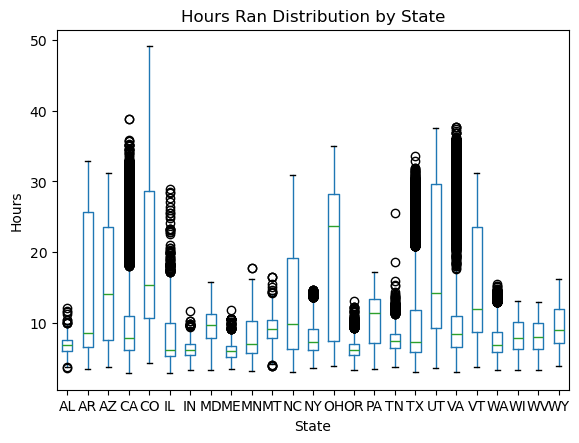

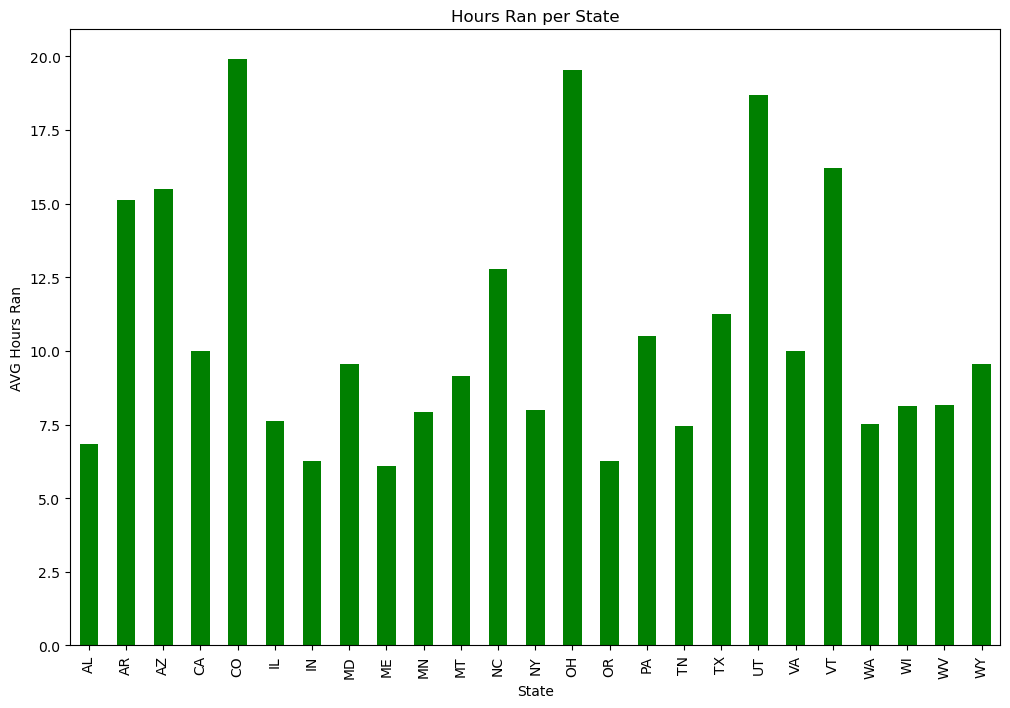

In [273]:
plt.figure(figsize=(10,6))
plt.scatter(true_age_df['true age'], true_age_df['Hours Ran'], color='b')
plt.title('Age vs. Hours Ran')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,8))
true_age_df.boxplot(column='Hours Ran', by='state_code', grid=False)
plt.title('Hours Ran Distribution by State')
plt.suptitle('')
plt.xlabel('State')
plt.ylabel('Hours')
plt.show()

plt.figure(figsize=(12, 8))
avg_mph_per_state = true_age_df.groupby('state_code')['Hours Ran'].mean()
avg_mph_per_state.plot(kind='bar', color='g')
plt.title('Hours Ran per State')
plt.xlabel('State')
plt.ylabel('AVG Hours Ran')
plt.show()

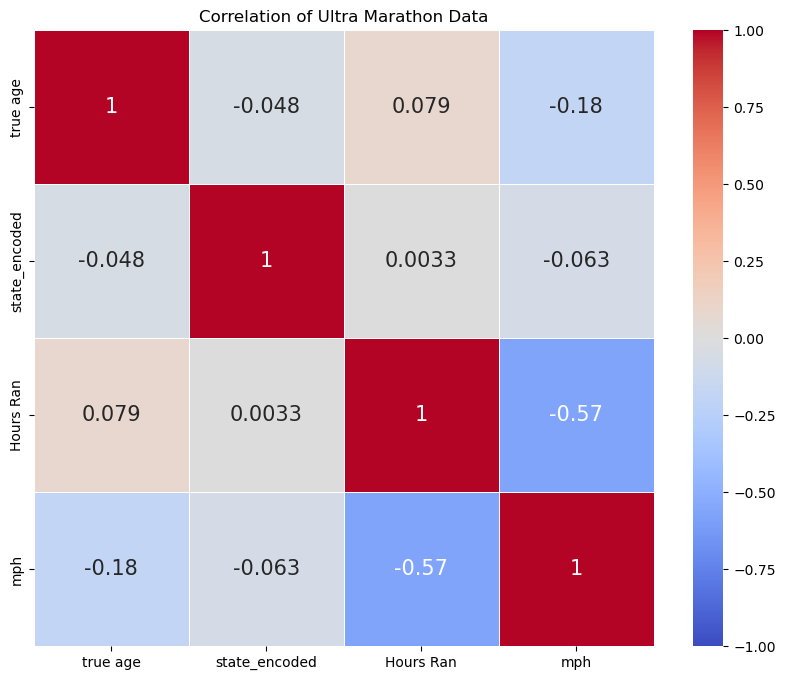

In [274]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, annot_kws={"size": 15})
plt.title('Correlation of Ultra Marathon Data')
plt.show()

In [275]:

corr_matrix_all = true_age_df[['true age', 'mph', 'Elevation Gain (feet)', 'Hours Ran', 'Highest Elevation (feet)', 'Average state elevation (feet)', 'Distance (miles)']].corr()
corr_matrix_all

,true age,mph,Elevation Gain (feet),Hours Ran,Highest Elevation (feet),Average state elevation (feet),Distance (miles)
true age,1.000000,-0.182835,0.005163,0.079132,-0.027126,0.004245,0.029111
mph,-0.182835,1.000000,-0.399113,-0.565679,-0.294910,-0.207750,-0.321122
Elevation Gain (feet),0.005163,-0.399113,1.000000,0.713964,0.709031,0.584689,0.647556
Hours Ran,0.079132,-0.565679,0.713964,1.000000,0.456891,0.300038,0.933962
Highest Elevation (feet),-0.027126,-0.294910,0.709031,0.456891,1.000000,0.791104,0.400472
Average state elevation (feet),0.004245,-0.207750,0.584689,0.300038,0.791104,1.000000,0.237825
Distance (miles),0.029111,-0.321122,0.647556,0.933962,0.400472,0.237825,1.000000


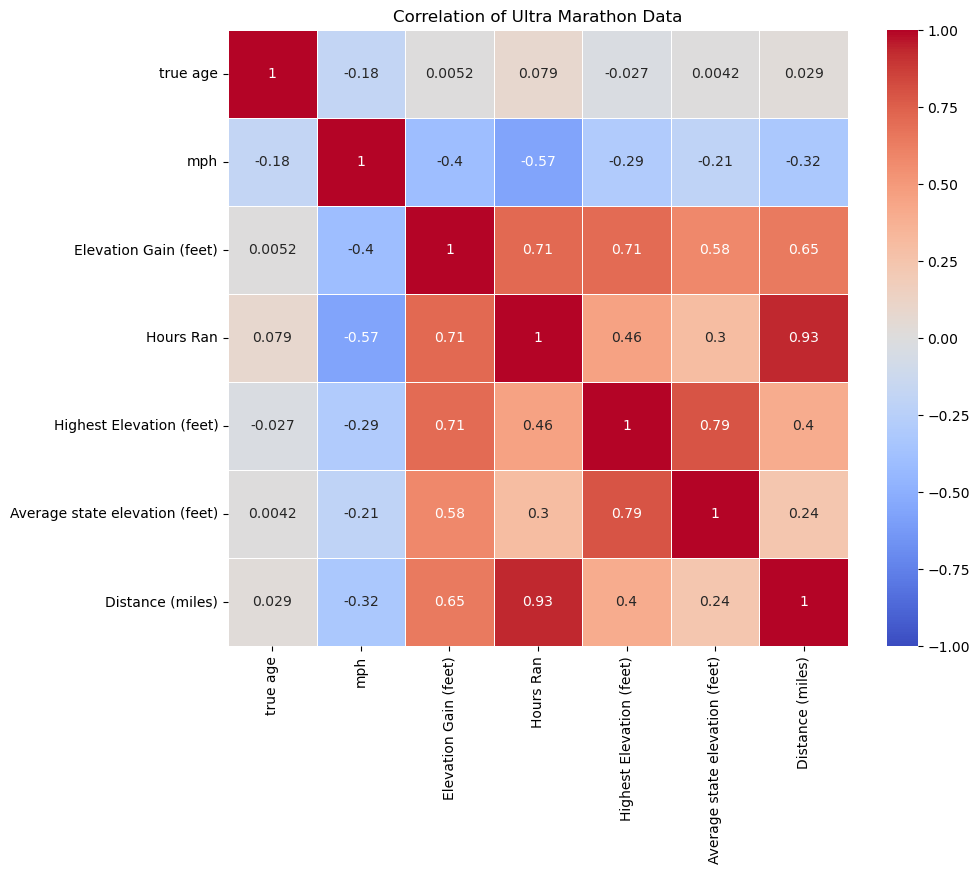

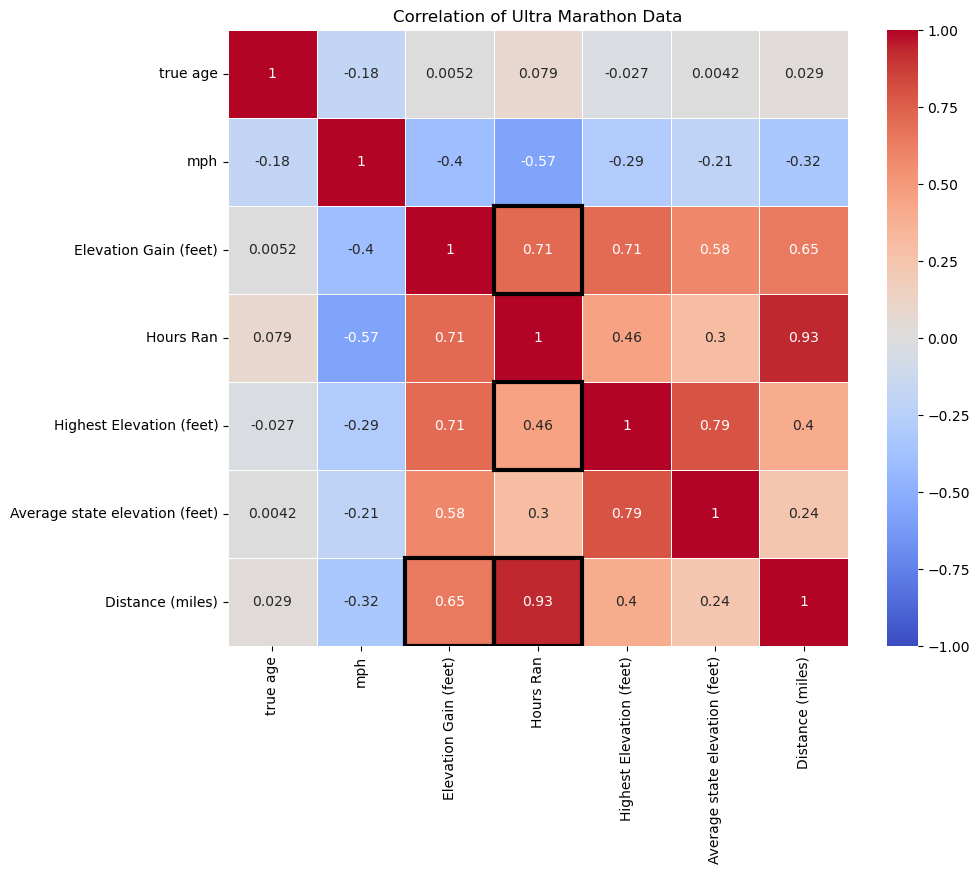

In [318]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation of Ultra Marathon Data')

plt.figure(figsize=(10, 8)) 
heatmap = sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, annot_kws={"size": 10}) 
plt.title('Correlation of Ultra Marathon Data') 
rectangles = [
    (3,6),
    (3,2),
    (3,4),
    (2,6)
]
for x, y in rectangles: 
    rect = Rectangle((x, y), 1, 1, fill=False, edgecolor='black', linewidth=3) 
    heatmap.add_patch(rect)
plt.show()

In [277]:
ultra_marathon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424248 entries, 0 to 424247
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year of event                   424248 non-null  int64  
 1   Event name                      424248 non-null  object 
 2   Event number of finishers       424248 non-null  int64  
 3   Athlete performance             424248 non-null  object 
 4   Athlete club                    327260 non-null  object 
 5   Athlete country                 424248 non-null  object 
 6   Athlete year of birth           424248 non-null  int64  
 7   Athlete gender                  424248 non-null  object 
 8   Athlete age category            424248 non-null  object 
 9   Athlete ID                      424248 non-null  int64  
 10  true age                        424248 non-null  int64  
 11  State                           424248 non-null  object 
 12  Highest Elevatio